# Project - customer churn dataset 

In [1]:
# Install the necessary libraries (if not already installed)
!pip install pandas numpy matplotlib seaborn plotly scikit-learn statsmodels imbalanced-learn category_encoders

# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from category_encoders import OneHotEncoder
import statsmodels.api as sm

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----------------------------------- ---- 71.7/81.9 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 1.2 MB/s eta 0:00:00


Matplotlib is building the font cache; this may take a moment.


In [6]:
##### Extract the 5th column and store it in ‘customer_5’

data = pd.read_csv(r"D:\Data Analytics course\Python\Project 1 - Customer churn\customer_churn.csv")

# Extract the 5th column
customer_5 = data.iloc[:, 4]

# Add the extracted column as a new column in the DataFrame
data['customer_5_copy'] = customer_5

# Save the updated DataFrame to a new CSV file in a directory with more permissive access
new_file_path = r"D:\Data Analytics course\Python\Project 1 - Customer churn\customer_churn.csv"
data.to_csv(new_file_path, index=False)

# Display the first few rows of the updated DataFrame to verify
print(data.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No             

In [8]:
####● Extract the 15th column and store it in ‘customer_15’


data = pd.read_csv(r"D:\Data Analytics course\Python\Project 1 - Customer churn\customer_churn.csv")

# Extract the 15th column
customer_15 = data.iloc[:, 14]

# Add the extracted column as a new column in the DataFrame
data['customer_15_copy'] = customer_15

# Save the updated DataFrame to a new CSV file in a directory with more permissive access
new_file_path = r"D:\Data Analytics course\Python\Project 1 - Customer churn\customer_churn.csv"
data.to_csv(new_file_path, index=False)

# Display the first few rows of the updated DataFrame to verify
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0          

In [17]:
###● Extract all the male senior citizens whose payment method is electronic
#check and store the result in ‘senior_male_electronic’


# Load the dataset
file_path = r"D:\Data Analytics course\Python\Project 1 - Customer churn\customer_churn.csv"
data = pd.read_csv(file_path)

# Filter the DataFrame for male senior citizens whose payment method is electronic check
condition = (data['gender'] == 'Male') & (data['SeniorCitizen'] == 1) & (data['PaymentMethod'] == 'Electronic check')

# Create a new column 'senior_male_electronic' based on the condition
data['senior_male_electronic'] = condition

# Define the path to save the filtered result
output_path = r"D:\Data Analytics course\Python\Project 1 - Customer churn\customer_churn.csv"

# Save the updated DataFrame to a new CSV file in a directory with more permissive access
new_file_path = r"D:\Data Analytics course\Python\Project 1 - Customer churn\customer_churn.csv"
data.to_csv(new_file_path, index=False)

# Display the first few rows of the updated DataFrame to verify
print(data.head())

   customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  8779-QRDMV   Male              1      No         No       1           No   
1  1658-BYGOY   Male              1      No         No      18          Yes   
2  5067-XJQFU   Male              1     Yes        Yes      66          Yes   
3  0191-ZHSKZ   Male              1      No         No      30          Yes   
4  2424-WVHPL   Male              1      No         No       1          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingMovies  \
0  No phone service             DSL             No  ...             Yes   
1               Yes     Fiber optic             No  ...             Yes   
2               Yes     Fiber optic             No  ...             Yes   
3                No             DSL            Yes  ...             Yes   
4                No     Fiber optic             No  ...              No   

         Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
0  

In [19]:
##● Extract all those customers whose tenure is greater than 70 months ortheir monthly charges is more than $100 and store the result in
#‘customer_total_tenure’

# Load the dataset
file_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\customer_churn.csv'
data = pd.read_csv(file_path)

# Filter the DataFrame for customers whose tenure is greater than 70 months or their monthly charges are more than $100
condition = (data['tenure'] > 70) | (data['MonthlyCharges'] > 100)

# Create a new column 'customer_total_tenure' based on the condition
data['customer_total_tenure'] = condition

# Define the path to save the updated DataFrame
output_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\updated_customer_churn.csv'

# Save the updated DataFrame to a new CSV file in a directory with more permissive access
new_file_path = r"D:\Data Analytics course\Python\Project 1 - Customer churn\customer_churn.csv"
data.to_csv(new_file_path, index=False)

# Display the first few rows of the updated DataFrame to verify
print(data.head())


   customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  8779-QRDMV   Male              1      No         No       1           No   
1  1658-BYGOY   Male              1      No         No      18          Yes   
2  5067-XJQFU   Male              1     Yes        Yes      66          Yes   
3  0191-ZHSKZ   Male              1      No         No      30          Yes   
4  2424-WVHPL   Male              1      No         No       1          Yes   

      MultipleLines InternetService OnlineSecurity  ...        Contract  \
0  No phone service             DSL             No  ...  Month-to-month   
1               Yes     Fiber optic             No  ...  Month-to-month   
2               Yes     Fiber optic             No  ...        One year   
3                No             DSL            Yes  ...  Month-to-month   
4                No     Fiber optic             No  ...  Month-to-month   

  PaperlessBilling     PaymentMethod MonthlyCharges TotalCharges Churn  \


In [20]:
## Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in
# ‘two_mail_yes’

# Load the dataset
file_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\customer_churn.csv'
data = pd.read_csv(file_path)

# Filter the DataFrame for customers whose contract is two years, payment method is mailed check, and churn is 'Yes'
condition = (data['Contract'] == 'Two year') & (data['PaymentMethod'] == 'Mailed check') & (data['Churn'] == 'Yes')

# Create a new column 'two_mail_yes' based on the condition
data['two_mail_yes'] = condition

# Define the path to save the updated DataFrame
output_path = 'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\updated_customer_churn.csv'

# Save the updated DataFrame to a new CSV file in a directory with more permissive access
new_file_path = r"D:\Data Analytics course\Python\Project 1 - Customer churn\customer_churn.csv"
data.to_csv(new_file_path, index=False)

# Display the first few rows of the updated DataFrame to verify
print(data.head())

   customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  8779-QRDMV   Male              1      No         No       1           No   
1  1658-BYGOY   Male              1      No         No      18          Yes   
2  5067-XJQFU   Male              1     Yes        Yes      66          Yes   
3  0191-ZHSKZ   Male              1      No         No      30          Yes   
4  2424-WVHPL   Male              1      No         No       1          Yes   

      MultipleLines InternetService OnlineSecurity  ... PaperlessBilling  \
0  No phone service             DSL             No  ...              Yes   
1               Yes     Fiber optic             No  ...              Yes   
2               Yes     Fiber optic             No  ...              Yes   
3                No             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

      PaymentMethod MonthlyCharges TotalCharges Churn customer_5_cop

In [22]:
##● Extract 333 random records from the customer_churndataframe and store
#the result in ‘customer_333’

file_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\customer_churn.csv'
data = pd.read_csv(file_path)

# Check the number of rows in the DataFrame
num_rows = len(data)

# Ensure you can sample up to 333 records
if num_rows >= 333:
    # Select 333 random records
    random_333 = data.sample(n=333, replace=False, random_state=1).index
else:
    # Sample the entire DataFrame
    random_333 = data.index

# Create a new column 'customer_333' based on whether the index is in the random_333
data['customer_333'] = data.index.isin(random_333)

# Define the path to save the updated DataFrame
output_path = 'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\updated_customer_churn.csv'

# Save the updated DataFrame to a new CSV file in a directory with more permissive access
new_file_path = r"D:\Data Analytics course\Python\Project 1 - Customer churn\customer_churn.csv"
data.to_csv(new_file_path, index=False)

# Display the first few rows of the updated DataFrame to verify
print(data.head())

   customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  8779-QRDMV   Male              1      No         No       1           No   
1  1658-BYGOY   Male              1      No         No      18          Yes   
2  5067-XJQFU   Male              1     Yes        Yes      66          Yes   
3  0191-ZHSKZ   Male              1      No         No      30          Yes   
4  2424-WVHPL   Male              1      No         No       1          Yes   

      MultipleLines InternetService OnlineSecurity  ...     PaymentMethod  \
0  No phone service             DSL             No  ...  Electronic check   
1               Yes     Fiber optic             No  ...  Electronic check   
2               Yes     Fiber optic             No  ...  Electronic check   
3                No             DSL            Yes  ...  Electronic check   
4                No     Fiber optic             No  ...  Electronic check   

  MonthlyCharges TotalCharges Churn customer_5_copy customer_1

In [23]:
# Get the count of different levels from the ‘Churn’ column
# Load the dataset
file_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\customer_churn.csv'
data = pd.read_csv(file_path)

# Get the counts of different levels in the 'Churn' column
churn_counts = data['Churn'].value_counts()

# Create a new column 'total_count' based on the 'Churn' column counts
data['total_count'] = data['Churn'].map(churn_counts)

# Define the path to save the updated DataFrame
output_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\updated_customer_churn.csv'

# Save the updated DataFrame to a new CSV file in a directory with more permissive access
new_file_path = r"D:\Data Analytics course\Python\Project 1 - Customer churn\customer_churn.csv"
data.to_csv(new_file_path, index=False)

# Display the first few rows of the updated DataFrame to verify
print(data.head())

   customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  8779-QRDMV   Male              1      No         No       1           No   
1  1658-BYGOY   Male              1      No         No      18          Yes   
2  5067-XJQFU   Male              1     Yes        Yes      66          Yes   
3  0191-ZHSKZ   Male              1      No         No      30          Yes   
4  2424-WVHPL   Male              1      No         No       1          Yes   

      MultipleLines InternetService OnlineSecurity  ... MonthlyCharges  \
0  No phone service             DSL             No  ...          39.65   
1               Yes     Fiber optic             No  ...          95.45   
2               Yes     Fiber optic             No  ...         108.45   
3                No             DSL            Yes  ...          74.75   
4                No     Fiber optic             No  ...          74.70   

  TotalCharges Churn customer_5_copy customer_15_copy senior_male_electronic  \


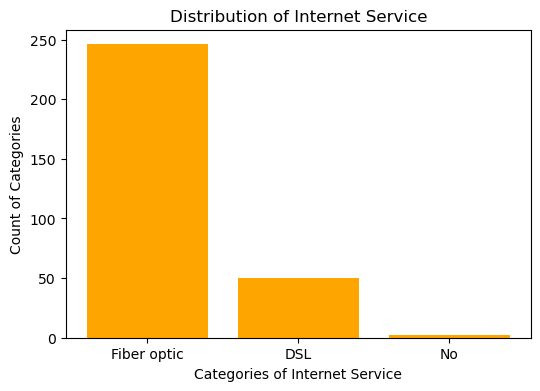

In [25]:
#● Build a bar-plot for the ’InternetService’ column:
#a. Set x-axis label to ‘Categories of Internet Service’
#b. Set y-axis label to ‘Count of Categories’
#c. Set the title of plot to be ‘Distribution of Internet Service’
#d. Set the color of the bars to be ‘orange

# Load the dataset
file_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\customer_churn.csv'
data = pd.read_csv(file_path)

# Get counts of each category in 'InternetService' column
internet_counts = data['InternetService'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(internet_counts.index, internet_counts.values, color='orange')

# Adding labels and title
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

# Display the plot
plt.show()

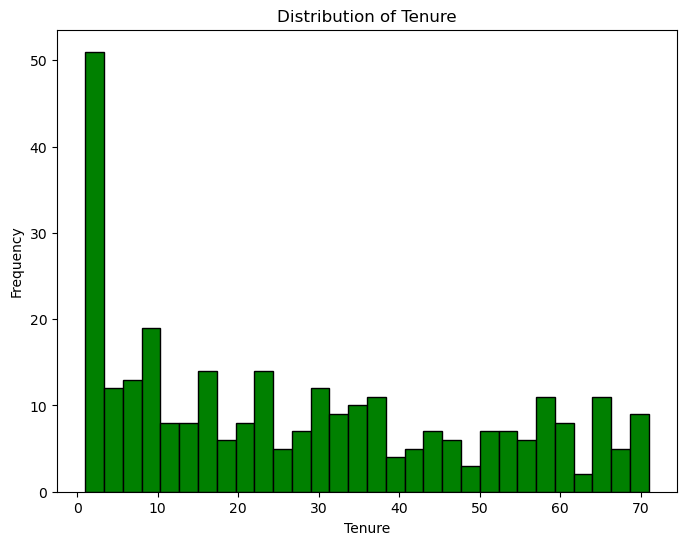

In [26]:
#● Build a histogram for the ‘tenure’ column:
#a. Set the number of bins to be 30
#b. Set the color of the bins to be ‘green’
#c. Assign the title ‘Distribution of tenure'


file_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\customer_churn.csv'
data = pd.read_csv(file_path)

# Plotting
plt.figure(figsize=(8, 6))
plt.hist(data['tenure'], bins=30, color='green', edgecolor='black')

# Adding labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

# Display the plot
plt.show()

Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
a. Assign the points a color of ‘brown’
b. Set the x-axis label to ‘Tenure of customer’
c. Set the y-axis label to ‘Monthly Charges of customer’
d. Set the title to ‘Tenure vs Monthly Charges’
e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
y-axis &
f. ‘Contract’ on the x-axis

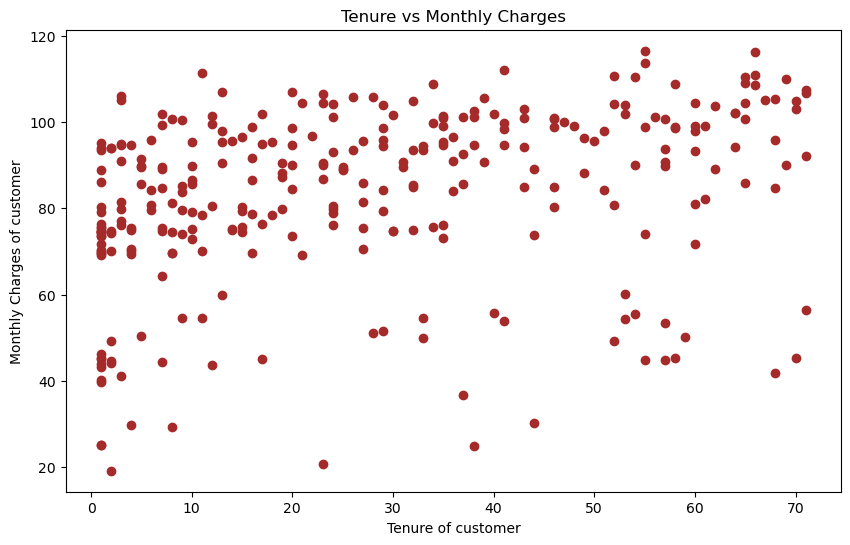

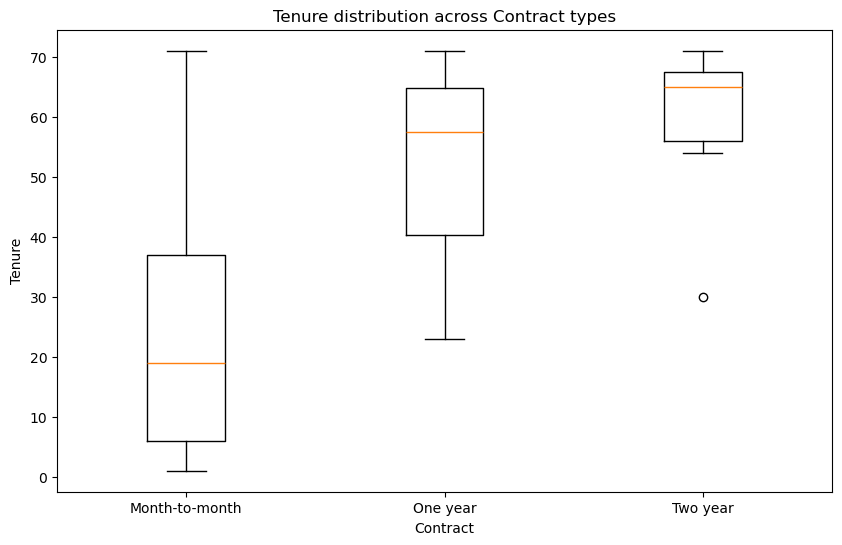

In [27]:


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['tenure'], data['MonthlyCharges'], color='brown')

# Adding labels and title
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

# Display the scatter plot
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data.groupby('Contract')['tenure'].apply(list), labels=data['Contract'].unique())

# Adding labels and title
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure distribution across Contract types')

# Display the box plot
plt.show()

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\customer_churn.csv'
data = pd.read_csv(file_path)

# Prepare the data
X = data['tenure'].values.reshape(-1, 1)  # Independent variable: tenure
y = data['MonthlyCharges'].values  # Dependent variable: MonthlyCharges

# Split the dataset into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the error in prediction
error = y_test - y_pred

# Print RMSE and error
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Store the results in the DataFrame
data['error'] = np.nan  # Initialize error column with NaNs
data.loc[data.index.isin(X_test.flatten()), 'error'] = error  # Assign error values to test set rows

# Display the updated DataFrame with error column
print(data.head())

Root Mean Squared Error (RMSE): 20.57


ValueError: Must have equal len keys and value when setting with an iterable

● Build a simple logistic regression model where dependent variable is
‘Churn’ and independent variable is ‘MonthlyCharges’:
a. Divide the dataset in 65:35 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and get the accuracy score
d. Build a multiple logistic regression model where dependent variable
is ‘Churn’ and independent variables are ‘tenure’ and
‘MonthlyCharges’
e. Divide the dataset in 80:20 ratio
f. Build the model on train set and predict the values on test set
g. Build the confusion matrix and get the accuracy score

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


# Load the dataset
file_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\customer_churn.csv'
data = pd.read_csv(file_path)

# Prepare the data
X = data['MonthlyCharges'].values.reshape(-1, 1)  # Independent variable: MonthlyCharges
y = data['Churn']  # Dependent variable: Churn

# Split the dataset into train and test sets (65:35 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

# Build the logistic regression model
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Build confusion matrix and calculate accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy score
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy Score: {accuracy:.2f}")

Confusion Matrix:
[[ 0 48]
 [ 0 57]]
Accuracy Score: 0.54


Build a decision tree model where dependent variable is ‘Churn’ and
independent variable is ‘tenure’:
a. Divide the dataset in 80:20 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and calculate the accuracy

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
file_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\customer_churn.csv'
data = pd.read_csv(file_path)

# Prepare the data
X = data['tenure'].values.reshape(-1, 1)  # Independent variable: tenure
y = data['Churn']  # Dependent variable: Churn

# Split the dataset into train and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Build the decision tree model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Build confusion matrix and calculate accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy score
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy Score: {accuracy:.2f}")

Confusion Matrix:
[[19  7]
 [13 21]]
Accuracy Score: 0.67


● Build a Random Forest model where dependent variable is ‘Churn’ and
independent variables are ‘tenure’ and ‘MonthlyCharges’:
a. Divide the dataset in 70:30 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and calculate the accuracy

In [41]:

# Load the dataset
file_path = r'D:\\Data Analytics course\\Python\\Project 1 - Customer churn\\customer_churn.csv'
data = pd.read_csv(file_path)

# Prepare the data
X = data[['tenure', 'MonthlyCharges']]  # Independent variables: tenure and MonthlyCharges
y = data['Churn']  # Dependent variable: Churn

# Split the dataset into train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Build the Random Forest model
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Build confusion matrix and calculate accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy score
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy Score: {accuracy:.2f}")

Confusion Matrix:
[[24 18]
 [13 35]]
Accuracy Score: 0.66
